In [1]:
!pip install vit-pytorch
!pip install torchvision

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from vit_pytorch import ViT
import matplotlib.pyplot as plt

In [3]:
# Khai báo số lượng worker
NUM_WORKERS = os.cpu_count()
NUM_WORKERS

4

In [ ]:
# from torch.utils.data import DataLoader, WeightedRandomSampler
# import numpy as np
# from torchvision import datasets, transforms

# def create_dataloaders_with_oversampling(
#     train_dir: str,
#     test_dir: str,
#     val_dir: str,
#     transform: transforms.Compose,
#     batch_size: int,
#     num_workers: int = 4
# ):
#     # Load datasets
#     train_data = datasets.ImageFolder(train_dir, transform=transform)
#     test_data = datasets.ImageFolder(test_dir, transform=transform)
#     val_data = datasets.ImageFolder(val_dir, transform=transform)
    
#     class_names = train_data.classes
    
#     # Compute class weights for oversampling
#     class_counts = np.bincount([label for _, label in train_data.samples])
#     class_weights = 1.0 / class_counts
#     sample_weights = [class_weights[label] for _, label in train_data.samples]
    
#     sampler = WeightedRandomSampler(
#         weights=sample_weights,
#         num_samples=len(sample_weights),
#         replacement=True
#     )
    
#     # DataLoaders
#     train_dataloader = DataLoader(
#         train_data,
#         batch_size=batch_size,
#         sampler=sampler,  # Use sampler instead of shuffle
#         num_workers=num_workers,
#         pin_memory=True,
#     )
#     test_dataloader = DataLoader(
#         test_data,
#         batch_size=batch_size,
#         shuffle=False,
#         num_workers=num_workers,
#         pin_memory=True,
#     )
#     val_dataloader = DataLoader(
#         val_data,
#         batch_size=batch_size,
#         shuffle=False,
#         num_workers=num_workers,
#         pin_memory=True,
#     )

#     return train_dataloader, test_dataloader, val_dataloader, class_names

In [5]:
def create_dataloaders_with_val(
    train_dir: str, 
    test_dir: str, 
    val_dir: str,
    transform: transforms.Compose, 
    batch_size: int, 
    num_workers: int = NUM_WORKERS
):
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)
    val_data = datasets.ImageFolder(val_dir, transform=transform)

    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )
    val_dataloader = DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )

    return train_dataloader, test_dataloader, val_dataloader, class_names

In [6]:
train_dir = '/kaggle/input/vietnamesefoods/FOOD-DATASET/TRAIN'
val_dir = '/kaggle/input/vietnamesefoods/FOOD-DATASET/VAL'
test_dir = '/kaggle/input/vietnamesefoods/FOOD-DATASET/TEST'

In [7]:
# Kích thước ảnh và pipeline transform
IMG_SIZE = 128
BATCH_SIZE = 32

In [8]:
# transform = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),  # Resize ảnh về kích thước chuẩn
#     transforms.RandomHorizontalFlip(),  # Lật ngang ngẫu nhiên
#     transforms.RandomRotation(20),  # Xoay ngẫu nhiên
#     transforms.ToTensor(),  # Chuyển thành tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Chuẩn hóa
# ])

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize theo ImageNet nếu cần
])

In [10]:
train_dataloader, test_dataloader, val_dataloader, class_names = create_dataloaders_with_val(
    train_dir=train_dir,
    test_dir=test_dir,
    val_dir=val_dir,
    transform=transform,
    batch_size=BATCH_SIZE
)

Classes: ['Banh beo', 'Banh bot loc', 'Banh can', 'Banh canh', 'Banh chung', 'Banh cuon', 'Banh duc', 'Banh gio', 'Banh khot', 'Banh mi', 'Banh pia', 'Banh tet', 'Banh trang nuong', 'Banh xeo', 'Bun bo Hue', 'Bun dau mam tom', 'Bun mam', 'Bun rieu', 'Bun thit nuong', 'Bánh cu đơ', 'Bánh mì cay', 'Bánh đa cua', 'Bánh đậu xanh', 'Bò bía', 'Bún cá', 'Ca kho to', 'Canh chua', 'Cao lau', 'Chao long', 'Com tam', 'Cơm cháy', 'Goi cuon', 'Hu tieu', 'Mi quang', 'Nem chua', 'Nem nướng', 'Pho', 'Xoi xeo']
Số lượng lớp: 38


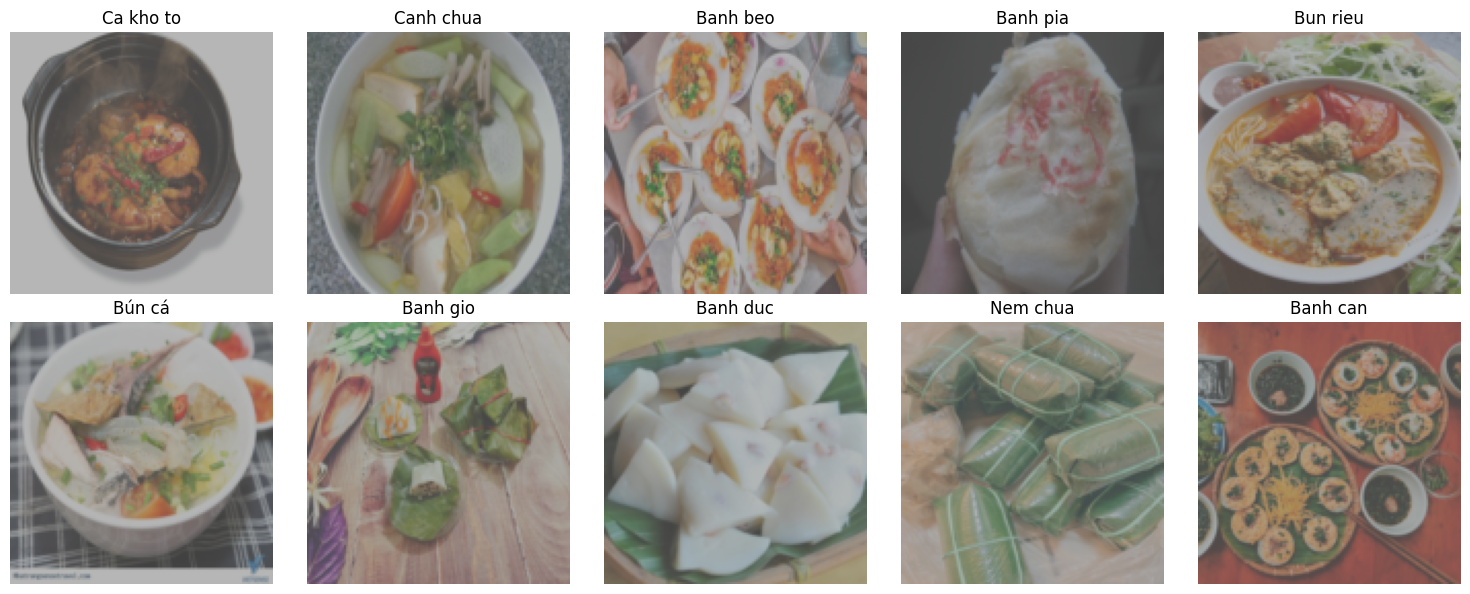

In [11]:
# Kiểm tra số lớp
print(f"Classes: {class_names}")
print(f"Số lượng lớp: {len(class_names)}")

# Hiển thị một batch từ train_dataloader
import matplotlib.pyplot as plt

# Lấy một batch
images, labels = next(iter(train_dataloader))
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        image = images[idx].permute(1, 2, 0)  # Chuyển trục để hiển thị
        label = class_names[labels[idx]]
        ax[i, j].imshow(image.numpy() * 0.229 + 0.485)  # Denormalize ảnh
        ax[i, j].set_title(label)
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()

In [12]:
import torch
from vit_pytorch.cct import cct_4

model = cct_4(
    img_size = IMG_SIZE,
    n_conv_layers = 1,
    kernel_size = 7,
    stride = 2,
    padding = 3,
    pooling_kernel_size = 3,
    pooling_stride = 2,
    pooling_padding = 1,
    num_classes = len(class_names),
    positional_embedding = 'learnable', # ['sine', 'learnable', 'none']
)

In [18]:
# Cấu hình loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
# Thiết bị
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

CCT(
  (tokenizer): Tokenizer(
    (conv_layers): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 128, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): ReLU()
        (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      )
    )
  )
  (classifier): TransformerClassifier(
    (attention_pool): Linear(in_features=128, out_features=1, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (pre_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (self_attn): Attention(
          (qkv): Linear(in_features=128, out_features=384, bias=False)
          (attn_drop): Dropout(p=0.1, inplace=False)
          (proj): Linear(in_features=128, out_features=128, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (linear1): Linear(in_features=128, out_features=128, bias=True)
        (dropout1): Dropout(p=0.0, in

In [14]:
# Tính tổng số tham số
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total trainable parameters: {total_params}")

Total trainable parameters: 551975


In [20]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Định nghĩa hàm lưu checkpoint
def save_checkpoint(model, optimizer, epoch, filepath):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, filepath)

# Hàm cập nhật đồ thị trong quá trình huấn luyện
def update_plot(epoch, train_losses, val_losses):
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
# Khởi tạo danh sách lưu loss
train_losses = []
val_losses = []
best_val_loss = float('inf')  # Để lưu checkpoint khi loss giảm

num_epochs = 10  # Số epoch để huấn luyện

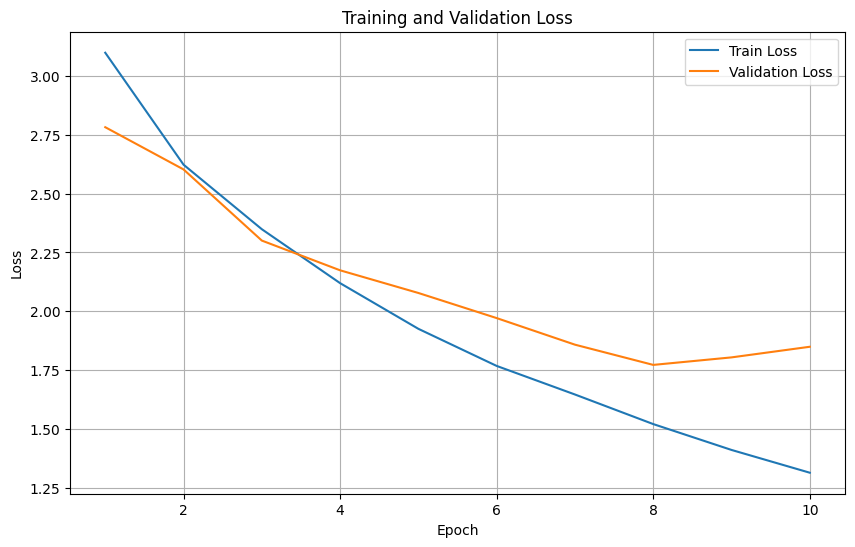

Epoch 10, Train Loss: 1.3137
Epoch 10, Validation Loss: 1.8491


In [21]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Thêm thanh tiến trình cho dataloader
    loop = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)
    
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        # Cập nhật mô tả của thanh tiến trình
        loop.set_postfix(loss=loss.item())
    
    # Tính loss trung bình cho tập huấn luyện
    avg_train_loss = running_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    
    # Đánh giá trên tập validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    
    # if avg_val_loss < best_val_loss:
    #     best_val_loss = avg_val_loss
    #     save_checkpoint(model, optimizer, epoch+1, f"best_model_epoch_{epoch+1}.pth")
    #     print(f"Model checkpoint saved at epoch {epoch+1}")
    
    # Cập nhật đồ thị sau mỗi epoch
    update_plot(epoch, train_losses, val_losses)
    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}")
    print(f"Epoch {epoch+1}, Validation Loss: {avg_val_loss:.4f}")

In [22]:
# Kiểm tra kết quả
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 49.04%


In [23]:
# Kiểm tra kết quả
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 48.62%


In [24]:
# Lưu toàn bộ mô hình
torch.save(model.state_dict(), "cct_16_food_classification.pth")

print("Model saved successfully!")

Model saved successfully!


In [25]:
from sklearn.metrics import classification_report

# Đặt mô hình ở chế độ đánh giá
model.eval()

true_labels = []
predicted_labels = []

# Duyệt qua tập dữ liệu kiểm tra
with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        
        # Dự đoán
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Lưu nhãn thực tế và nhãn dự đoán
        true_labels.extend(labels.cpu().numpy())  # Chuyển về CPU và lưu
        predicted_labels.extend(predicted.cpu().numpy())

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

Classification Report:
                  precision    recall  f1-score   support

        Banh beo       0.60      0.47      0.52       129
    Banh bot loc       0.51      0.24      0.33       144
        Banh can       0.25      0.67      0.37       149
       Banh canh       0.32      0.30      0.31       193
      Banh chung       0.58      0.37      0.45       102
       Banh cuon       0.44      0.41      0.43       228
        Banh duc       0.19      0.25      0.21       133
        Banh gio       0.66      0.50      0.57       129
       Banh khot       0.61      0.37      0.46       167
         Banh mi       0.80      0.62      0.69       268
        Banh pia       0.64      0.81      0.71        89
        Banh tet       0.53      0.43      0.47       138
Banh trang nuong       0.58      0.63      0.60       159
        Banh xeo       0.58      0.70      0.64       235
      Bun bo Hue       0.62      0.39      0.48       306
 Bun dau mam tom       0.74      0.84      0.79 